In [1]:
import hw3_utils as utils
#import matplotlib.pyplot as plt
#import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Block(nn.Module):
    """A basic block used to build ResNet."""

    def __init__(self, num_channels):
        """Initialize a building block for ResNet.

        Argument:
            num_channels: the number of channels of the input to Block, and is also
                          the number of channels of conv layers of Block.
        """
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(num_channels,num_channels,3,1,1,bias=False)
        self.conv1bn = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.Conv2d(num_channels,num_channels,3,1,1,bias=False)
        self.conv2bn = nn.BatchNorm2d(num_channels)
        
    def forward(self, x):
        """
        The input will have shape (N, num_channels, H, W),
        where N is the batch size, and H and W give the shape of each channel.

        The output should have the same shape as input.
        """
        xb = self.conv1(x)
        xb = F.relu(self.conv1bn(xb))
        xb = self.conv2(xb)
        xb = self.conv2bn(xb)
        x = x + xb
        x = F.relu(x)
        return x

In [6]:
block = Block(3)

In [15]:
block

Block(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv1bn): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2bn): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [10]:
torch.randn?

In [11]:
x = torch.randn(10*3*5*5).reshape(10,3,5,5)

In [13]:
block.forward(x).shape

torch.Size([10, 3, 5, 5])

In [223]:
class ResNet(nn.Module):
    """A simplified ResNet."""

    def __init__(self, num_channels, num_classes=10):
        """Initialize a shallow ResNet.

        Arguments:
            num_channels: the number of output channels of the conv layer
                          before the building block, and also 
                          the number of channels of the building block.
            num_classes: the number of output units.
        """
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(1,num_channels,3,2,1,bias=False)
        self.conv1bn = nn.BatchNorm2d(num_channels)
        self.maxpool = nn.MaxPool2d(2)
        self.B = Block(num_channels)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        
        self.fc = nn.Linear(num_channels,10)
        
        
    def forward(self, x):
        """
        The input will have shape (N, 1, H, W),
        where N is the batch size, and H and W give the shape of each channel.

        The output should have shape (N, 10).
        """
        
        x = self.conv1(x)
        
        x = F.relu(self.conv1bn(x))
        
        x = self.maxpool(x)
        x = self.B(x)
        x = self.avgpool(x)
        x = x.view(x.size()[0],-1)
        
        x = self.fc(x)
        return x

In [224]:
Res = ResNet(5)

In [225]:
x = torch.randn(10,1,5,10)

In [226]:
Res.forward(x).shape

torch.Size([10, 10])

In [220]:
Res.forward(x).shape

torch.Size([10, 5, 1, 1])

In [221]:
x.shape

torch.Size([10, 1, 5, 10])

In [222]:
x = torch.arange(3*10).reshape(3*5,2)

In [208]:
x = x.view(1,3,5,2)

In [240]:
x.shape

torch.Size([200, 2])

In [247]:
def one_nearest_neighbor(X,Y,X_test):
        
    # return labels for X_test as torch tensor
    yhat = torch.zeros(len(X_test))
    for i,val in enumerate(X_test):
        yhat[i] = Y[torch.argmin((val[0]-X[:,0])**2 + (val[1]-X[:,1])**2)]
        
    return yhat
        

In [246]:
torch.argmin?

In [244]:
X_test = torch.randn(10,2)

In [248]:
x,y = utils.load_one_nearest_neighbor_data()

In [249]:
one_nearest_neighbor(x,y,X_test)

tensor([-1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.])

In [238]:
((x[0][0] - x[:,0])**2+(x[0][1]-x[:,1])**2).shape

torch.Size([200])

<Figure size 432x288 with 0 Axes>

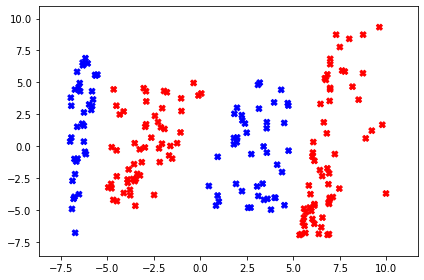

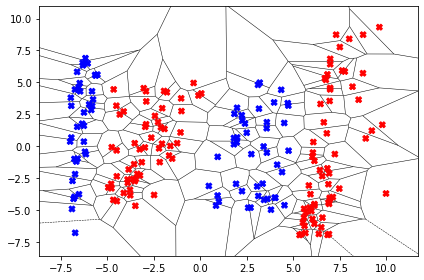

In [250]:
utils.voronoi_plot(x,y)